In [1]:
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd
import random #este se agrego

In [67]:
ruta="C:/Users/cresp/Documents/GitHub/Seminario_9273/Tarea 1/"
bd="data_schools.xlsx"
bd_escuelas=pd.read_excel(ruta+bd)
bd_escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


In [52]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random=bd_escuelas.sample(n=15,random_state=9998)[["escuela"]]
escuelas_random["f_seleccion"]=1
escuelas_random

,escuela,f_seleccion
37,38,1
51,52,1
75,76,1
5,6,1
73,74,1
21,22,1
57,58,1
10,11,1
35,36,1
39,40,1


In [53]:
bd_escuelas=pd.merge(bd_escuelas, escuelas_random, how="left", on=["escuela"])
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].fillna(0)
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].astype(int)
bd_escuelas

,escuela,LSAT,GPA,f_seleccion
0,1,622,3.23,0
1,2,542,2.83,0
2,3,579,3.24,0
3,4,653,3.12,0
4,5,606,3.09,0
...,...,...,...,...
77,78,590,3.15,0
78,79,558,2.81,0
79,80,611,3.16,0
80,81,564,3.02,0


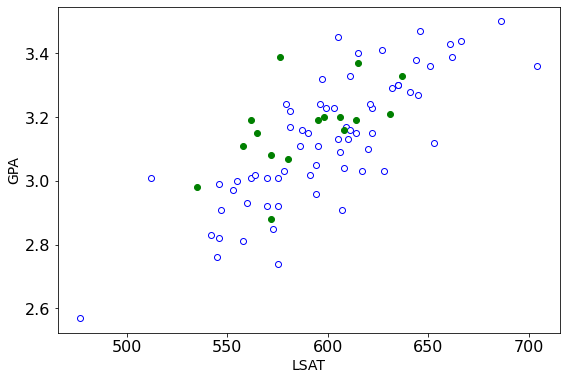

In [54]:
fig, ax = plt.subplots(figsize=(9,6))
plot(bd_escuelas[bd_escuelas["f_seleccion"]==0].LSAT, 
         bd_escuelas[bd_escuelas["f_seleccion"]==0].GPA, 'o', color='blue',markerfacecolor='white')
plot(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, 
         bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA, 'o', color='green')

xlabel("LSAT",size=14)
ylabel("GPA",size=14)
xticks(fontsize=16)
yticks(fontsize=16)
show()

In [6]:
corr, _ = spearmanr(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.659


In [7]:
corr, _ = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.753


In [8]:
#De tarea, obtener el error estandar de la correlacion y mostrar para que N la precisión 
# con respecto a la correlación de la muestra total
#Grafique los histogramas de las correlaciones
#Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

# Problema 2:

De la base data_schools sacar obtener el error estándar con Bootstrap de las variables de la base. 
Recordemos que tienen que simular N Muestras Boostrap con tamño n. Luego, el otro ejercicio es que lo hagan con n-1.

# Enfoque 1

In [9]:
bd_escuelas.corr(method ='pearson')

,escuela,LSAT,GPA,f_seleccion
escuela,1.000000,-0.055274,-0.096763,0.135526
LSAT,-0.055274,1.000000,0.759998,-0.110035
GPA,-0.096763,0.759998,1.000000,0.088550
f_seleccion,0.135526,-0.110035,0.088550,1.000000


In [10]:
bd_escuelas.corr(method ='spearman')

,escuela,LSAT,GPA,f_seleccion
escuela,1.000000,-0.094290,-0.102027,0.136511
LSAT,-0.094290,1.000000,0.752662,-0.117672
GPA,-0.102027,0.752662,1.000000,0.086482
f_seleccion,0.136511,-0.117672,0.086482,1.000000


In [11]:
mean(bd_escuelas['LSAT'])

597.5487804878048

In [12]:
mean(bd_escuelas['GPA'])

3.1348780487804877

Si solamente calculamos Bootstrap sobre una única muestra entonces no nos estaria dando muchas medias ya que solo nos estamos moviendo sobre una muestra, una prueba de ello es el codigo aquí abajo mencionado donde todas las muestras son las mismas y por ende las mismas medias, es por ello que trabajar sobre una misma muestra y duplicarla no tiene tanto sentido

In [13]:
media_muestral = []

for i in range (200):
    y = bd_escuelas.loc[bd_escuelas['f_seleccion'] == 1, 'LSAT']
    promedio = np.mean(y)
    media_muestral.append(promedio)
    
print(np.mean(media_muestral))

589.0


Ahora vamos a dar un remuestreo del remuestreo es decir de las 15 muestras bootstrap que extraimos de la base de las escuelas aplicaremos una muestra bootstrap para saber que tan eficiente es hacer el remuestreo tomando 15 datos. 

In [14]:
#Los 15 datos que tenemos en la f_seleccion los fijamos y hacemos el remuestreo con reemplazo
Remuestreo_15_fijos = np.random.choice(y,len(y),replace=True)
Remuestreo_15_fijos

array([580, 606, 606, 562, 606, 576, 615, 608, 572, 535, 608, 598, 576,
       598, 631, 615], dtype=int64)

In [15]:
mean(Remuestreo_15_fijos)

593.25

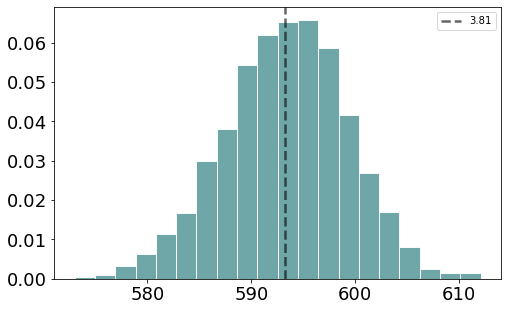

In [16]:
k=4000
m=np.zeros(k)
for j in range(k):
    m[j]=mean(np.random.choice(Remuestreo_15_fijos,len(Remuestreo_15_fijos),replace=True),)
fig, ax=subplots(figsize=(8,5))

hist(m,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9)
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(mean(Remuestreo_15_fijos),linestyle="--",color="black",linewidth=2.5,alpha=0.6,
        label="3.81")
legend()
#savefig("promedio_b.pdf")
show()

Podemos ver que pasa con otras N


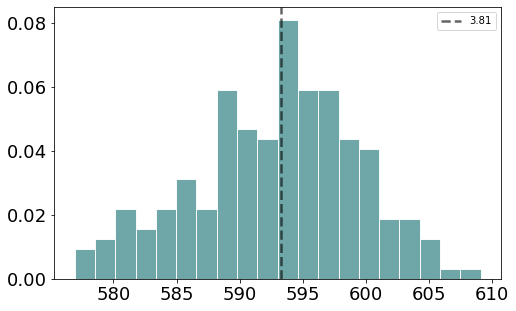

In [17]:
k=200
m=np.zeros(k)
for j in range(k):
    m[j]=mean(np.random.choice(Remuestreo_15_fijos,len(Remuestreo_15_fijos),replace=True),)

fig, ax=subplots(figsize=(8,5))
hist(m,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9)
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(mean(Remuestreo_15_fijos),linestyle="--",color="black",linewidth=2.5,alpha=0.6,
        label="3.81")
legend()
#savefig("promedio_b.pdf")
show()

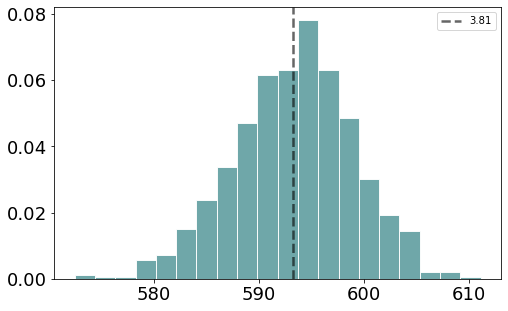

In [18]:
k=1000
m=np.zeros(k)
for j in range(k):
    m[j]=mean(np.random.choice(Remuestreo_15_fijos,len(Remuestreo_15_fijos),replace=True),)

fig, ax=subplots(figsize=(8,5))
hist(m,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9)
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(mean(Remuestreo_15_fijos),linestyle="--",color="black",linewidth=2.5,alpha=0.6,
        label="3.81")
legend()
#savefig("promedio_b.pdf")
show()

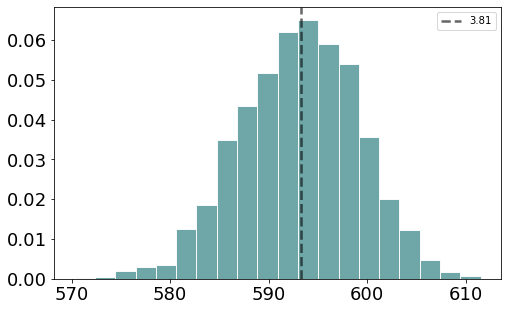

In [19]:
k=2000
m=np.zeros(k)
for j in range(k):
    m[j]=mean(np.random.choice(Remuestreo_15_fijos,len(Remuestreo_15_fijos),replace=True),)

fig, ax=subplots(figsize=(8,5))
hist(m,density=True,bins=20,edgecolor="w",color="cadetblue",alpha=0.9)
ax.xaxis.set_tick_params(labelsize=18,labelcolor="black")
ax.yaxis.set_tick_params(labelsize=18,labelcolor="black")
axvline(mean(Remuestreo_15_fijos),linestyle="--",color="black",linewidth=2.5,alpha=0.6,
        label="3.81")
legend()
#savefig("promedio_b.pdf")
show()

Mientras mas grande hacemos la k la cual es el número de muestas bootstrap podemos apreciar un comportamiento casi normal, lo que nos dice que mientras mas hacemos el experimento sobre las mismas 15 muestras seguiremos un comportamiento normal, pero ¿Que es lo que pasa con la correlación?

# Enfoque 2

Ahora generaremos aleatoriamente N muestras bootstrap diferentes con remplazo donde podamos apreciar diferentes medias y construir un histograma 

In [69]:
# Ahora vamos a repetir el proceso de seleccionar
# pero ahora desde la población de 82 seleccionaremos 15 al azar consecutivamente 

k = 10
for i in range(k):
    escuelas_random_2 = bd_escuelas.sample(n=15,random_state = i)[["escuela"]]
    escuelas_random_2["f_seleccion_n" + str(i)] = 2
    bd_escuelas = pd.merge(bd_escuelas, escuelas_random_2, how="left", on=["escuela"])
    
bd_escuelas = bd_escuelas.fillna(0)
bd_escuelas

# Las columnas tienen un 2 para hacer una diferencia de la primera muestra que se tomo las anteriores 
# tenian 1 

# print('Spearmans correlation: %.3f' % corr)
# bd_escuelas

,escuela,LSAT,GPA,f_seleccion_n0_x,f_seleccion_n1_x,f_seleccion_n2_x,f_seleccion_n3_x,f_seleccion_n4_x,f_seleccion_n5_x,f_seleccion_n6_x,...,f_seleccion_n0_y,f_seleccion_n1_y,f_seleccion_n2_y,f_seleccion_n3_y,f_seleccion_n4_y,f_seleccion_n5_y,f_seleccion_n6_y,f_seleccion_n7_y,f_seleccion_n8_y,f_seleccion_n9_y
0,1,622,3.23,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,2,542,2.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,3,579,3.24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,4,653,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
4,5,606,3.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,590,3.15,2.0,2.0,0.0,0.0,0.0,2.0,0.0,...,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
78,79,558,2.81,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
79,80,611,3.16,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
80,81,564,3.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#Sacamos la correlacion de las muestras 

bd_escuelas.corr(method ='spearman')

,escuela,LSAT,GPA,f_seleccion_n0_x,f_seleccion_n1_x,f_seleccion_n2_x,f_seleccion_n3_x,f_seleccion_n4_x,f_seleccion_n5_x,f_seleccion_n6_x,...,f_seleccion_n0_y,f_seleccion_n1_y,f_seleccion_n2_y,f_seleccion_n3_y,f_seleccion_n4_y,f_seleccion_n5_y,f_seleccion_n6_y,f_seleccion_n7_y,f_seleccion_n8_y,f_seleccion_n9_y
escuela,1.000000,-0.094290,-0.102027,0.020802,0.305852,0.006501,-0.040303,0.141712,-0.160589,-0.048643,...,0.020802,0.305852,0.006501,-0.040303,0.141712,-0.160589,-0.048643,-0.087107,-0.155258,0.061105
LSAT,-0.094290,1.000000,0.752662,0.017553,-0.005998,0.114421,0.040958,-0.023404,0.037986,-0.114623,...,0.017553,-0.005998,0.114421,0.040958,-0.023404,0.037986,-0.114623,0.028605,-0.053313,-0.096868
GPA,-0.102027,0.752662,1.000000,0.036414,0.015330,0.196373,-0.011704,-0.005202,-0.005332,-0.087316,...,0.036414,0.015330,0.196373,-0.011704,-0.005202,-0.005332,-0.087316,0.112492,-0.027328,-0.091684
f_seleccion_n0_x,0.020802,0.017553,0.036414,1.000000,-0.073773,0.068182,0.068182,0.068182,0.165019,-0.073773,...,1.000000,-0.073773,0.068182,0.068182,0.068182,0.165019,-0.073773,0.301136,-0.073773,-0.009470
f_seleccion_n1_x,0.305852,-0.005998,0.015330,-0.073773,1.000000,0.085422,0.005824,0.005824,0.184080,0.102488,...,-0.073773,1.000000,0.085422,0.005824,0.005824,0.184080,0.102488,0.085422,0.020896,0.085422
f_seleccion_n2_x,0.006501,0.114421,0.196373,0.068182,0.085422,1.000000,-0.087121,0.068182,-0.073773,0.165019,...,0.068182,0.085422,1.000000,-0.087121,0.068182,-0.073773,0.165019,0.145833,-0.153371,0.223485
f_seleccion_n3_x,-0.040303,0.040958,-0.011704,0.068182,0.005824,-0.087121,1.000000,-0.009470,0.005824,0.005824,...,0.068182,0.005824,-0.087121,1.000000,-0.009470,0.005824,0.005824,0.145833,-0.073773,0.145833
f_seleccion_n4_x,0.141712,-0.023404,-0.005202,0.068182,0.005824,0.068182,-0.009470,1.000000,-0.073773,-0.153371,...,0.068182,0.005824,0.068182,-0.009470,1.000000,-0.073773,-0.153371,0.068182,-0.073773,-0.009470
f_seleccion_n5_x,-0.160589,0.037986,-0.005332,0.165019,0.184080,-0.073773,0.005824,-0.073773,1.000000,0.020896,...,0.165019,0.184080,-0.073773,0.005824,-0.073773,1.000000,0.020896,0.085422,0.102488,-0.153371
f_seleccion_n6_x,-0.048643,-0.114623,-0.087316,-0.073773,0.102488,0.165019,0.005824,-0.153371,0.020896,1.000000,...,-0.073773,0.102488,0.165019,0.005824,-0.153371,0.020896,1.000000,0.005824,0.102488,0.005824


# Problema 3: 

Calcular el eror estándar de las betas del modelo lineal, les expliqué la idea de este problema.

In [9]:
bd="lineal_horm.xlsx"
bd_horm=pd.read_excel(ruta+bd)
bd_horm

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6
5,A,53,31.1
6,A,184,20.9
7,A,171,20.9
8,A,52,30.4
9,B,376,16.3


In [10]:
from sklearn import linear_model

In [11]:
reg = linear_model.LinearRegression()

In [12]:
X = bd_horm[["horas"]]
y = bd_horm[["monto"]]

In [13]:
reg.fit(X, y)

LinearRegression()

In [14]:
reg.coef_

array([[-0.0574463]])

In [15]:
reg.intercept_

array([34.16752817])

In [16]:
Y_pred = reg.predict(X) 
Y_pred

array([[28.4803446 ],
       [25.43569077],
       [17.33576266],
       [25.26335188],
       [22.90805363],
       [31.12287434],
       [23.59740921],
       [24.3442111 ],
       [31.18032064],
       [12.56771986],
       [12.05070318],
       [11.0741161 ],
       [32.50158551],
       [29.80160947],
       [17.16342376],
       [25.49313707],
       [23.9995333 ],
       [22.16125175],
       [27.33141863],
       [23.36762402],
       [27.56120382],
       [29.11225389],
       [30.83564285],
       [31.35265954],
       [25.55058337],
       [28.02077421],
       [26.98674084]])

In [17]:
y_estim=Y_pred.reshape(-1)
y_estim

array([28.4803446 , 25.43569077, 17.33576266, 25.26335188, 22.90805363,
       31.12287434, 23.59740921, 24.3442111 , 31.18032064, 12.56771986,
       12.05070318, 11.0741161 , 32.50158551, 29.80160947, 17.16342376,
       25.49313707, 23.9995333 , 22.16125175, 27.33141863, 23.36762402,
       27.56120382, 29.11225389, 30.83564285, 31.35265954, 25.55058337,
       28.02077421, 26.98674084])

In [18]:
x=X.to_numpy().reshape(-1)
x

array([ 99, 152, 293, 155, 196,  53, 184, 171,  52, 376, 385, 402,  29,
        76, 296, 151, 177, 209, 119, 188, 115,  88,  58,  49, 150, 107,
       125], dtype=int64)

In [19]:
y_real=y.to_numpy()
y_real=y_real.reshape(-1)
y_real
n=len(y_real)
y_real

array([25.8, 20.5, 14.3, 23.2, 20.6, 31.1, 20.9, 20.9, 30.4, 16.3, 11.6,
       11.8, 32.5, 32. , 18. , 24.1, 26.5, 25.8, 28.8, 22. , 29.7, 28.9,
       32.8, 32.5, 25.4, 31.7, 28.5])

In [20]:
residual=y_real-y_estim
residual

array([-2.68034460e+00, -4.93569077e+00, -3.03576266e+00, -2.06335188e+00,
       -2.30805363e+00, -2.28743430e-02, -2.69740921e+00, -3.44421110e+00,
       -7.80320642e-01,  3.73228014e+00, -4.50703175e-01,  7.25883902e-01,
       -1.58551177e-03,  2.19839053e+00,  8.36576241e-01, -1.39313707e+00,
        2.50046670e+00,  3.63874825e+00,  1.46858137e+00, -1.36762402e+00,
        2.13879618e+00, -2.12253889e-01,  1.96435715e+00,  1.14734046e+00,
       -1.50583369e-01,  3.67922579e+00,  1.51325916e+00])

Podemos obtener el error estándar del estimador de la siguiente manera
$$
\begin{equation}
\hat{se}_{\beta}=\sqrt{\frac{\sum_{i} \epsilon_{i}^{2}}{(n-2)\sum_{i}(x-\bar{x})^{2}}}
\end{equation}
$$

In [21]:
den=sum((x-np.mean(x))**2)
num=sum(residual**2)/(n)
err_reg=np.sqrt(num/den)
err_reg

0.004295652626358282

In [22]:
den=sum((x-np.mean(x))**2)
num=sum(residual**2)/(n-2)
err=np.sqrt(num/den)
err

0.0044641731603115384

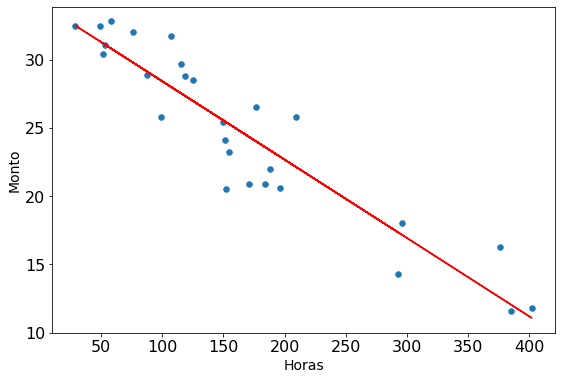

In [23]:
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(X, y,s=30)
plt.plot(X, Y_pred, color='red')
xlabel("Horas",size=14)
ylabel("Monto",size=14)
xticks(fontsize=16)
yticks(fontsize=16)
show()

In [24]:
#Calculemos el error estandar de las estimaciones de los parámetros haciendo bootstrap sobre los residuales

In [25]:
df = pd.DataFrame(residual,
                 columns=['residual'])
df["x"]=x
df

,residual,x
0,-2.680345,99
1,-4.935691,152
2,-3.035763,293
3,-2.063352,155
4,-2.308054,196
5,-0.022874,53
6,-2.697409,184
7,-3.444211,171
8,-0.780321,52
9,3.732280,376


In [26]:
r_i=np.random.choice(residual,len(residual),replace=True)
df_aux = pd.DataFrame(r_i,
                 columns=['residual'])
df_aux=pd.merge(df_aux, df, how="inner", on=["residual"])
df_aux

,residual,x
0,3.679226,107
1,-3.035763,293
2,-3.035763,293
3,-3.035763,293
4,-0.001586,29
5,-0.001586,29
6,2.198391,76
7,1.147340,49
8,2.138796,115
9,-1.367624,188


In [27]:
x_j=df_aux[["x"]].to_numpy().reshape(-1)
den=sum((x_j-np.mean(x_j))**2)
num=sum(r_i**2)/(n)
err=np.sqrt(num/den)
err

0.003985864761555361

In [28]:
simul=1000
res_boost= np.array( [ ])
for i in range(0,simul):
    r_i=np.random.choice(residual,len(residual),replace=True)
    df_aux = pd.DataFrame(r_i,
                 columns=['residual'])
    df_aux=pd.merge(df_aux, df, how="inner", on=["residual"])
    df_aux
    x_i=df_aux[["x"]].to_numpy().reshape(-1)
    den=sum((x_i-np.mean(x_i))**2)
    num=sum(r_i**2)/(n)
    err=np.sqrt(num/den)
    res_boost = np.append(res_boost,err)

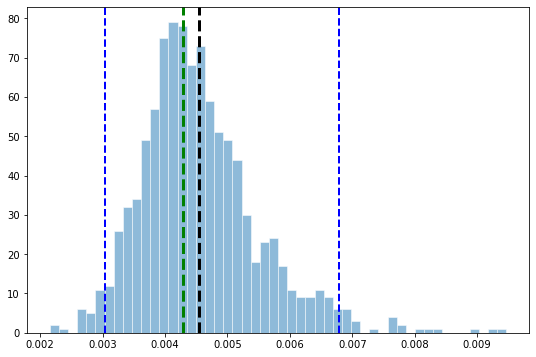

Error Estándar sin Bootsrap: 0.004295652626358282
Promedio de Error Estándar de la muestras Bootstrap: 0.004550773831590082
Promedio de Error Estándar de la muestras Bootstrap: 0.004550773831590082
( 0.0030427609573427496 , 0.006787280131648088 )


In [29]:
fig, ax = plt.subplots(figsize=(9,6))
hist(res_boost,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=err_reg,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(res_boost),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

axvline(percentile(res_boost,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(res_boost,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error Estándar sin Bootsrap:", err_reg)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(res_boost))
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(res_boost))
print("(", percentile(res_boost,2.5),",",percentile(res_boost,97.5),")")

# Problema 3: 

Calcular el eror estándar de las betas del modelo lineal, les expliqué la idea de este problema.